<a href="https://colab.research.google.com/github/safwan-the-coder/AIML2/blob/main/SML_Project%5BFinal%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load and Split Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = '/content/drive/MyDrive/SML Dataset/Premier League matches.csv'
data = pd.read_csv(file_path)

# Display first few rows of data to understand structure
print(data.head())

# Part 2: Data Preprocessing
# Select features and target
features = data[['opponent', 'venue', 'captain', 'referee', 'formation', 'xg', 'xga', 'sh', 'sot']]
target = data['result']

# Encode categorical columns
label_encoder = LabelEncoder()
for column in ['opponent', 'venue', 'captain', 'referee', 'formation']:
    features[column] = label_encoder.fit_transform(features[column])
target = label_encoder.fit_transform(target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

   Unnamed: 0        date           time            comp        round  day  \
0           0  2020-09-21  20:15 (21:15)  Premier League  Matchweek 2  Mon   
1           2  2020-09-27  16:30 (17:30)  Premier League  Matchweek 3  Sun   
2           4  2020-10-03  17:30 (18:30)  Premier League  Matchweek 4  Sat   
3           5  2020-10-17  17:30 (18:30)  Premier League  Matchweek 5  Sat   
4           7  2020-10-24  12:30 (13:30)  Premier League  Matchweek 6  Sat   

  venue result  gf  ga  ...  match report  notes  sh  sot  dist fk pk pkatt  \
0  Away      W   3   1  ...  Match Report    NaN  13    8  21.1  2  1     1   
1  Home      L   2   5  ...  Match Report    NaN  16    5  19.8  1  0     0   
2  Away      D   1   1  ...  Match Report    NaN  23    1  18.2  1  0     0   
3  Home      W   1   0  ...  Match Report    NaN  13    5  17.7  0  0     0   
4  Away      D   1   1  ...  Match Report    NaN  14    7  20.9  1  0     0   

  season             team  
0   2024  Manchester City  


<ipython-input-2-35b9abd1b3b9>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = label_encoder.fit_transform(features[column])
<ipython-input-2-35b9abd1b3b9>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = label_encoder.fit_transform(features[column])
<ipython-input-2-35b9abd1b3b9>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

**SVM**

--- Support Vector Machine (SVM) ---
Accuracy = 63.05%
Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.08      0.13       185
           1       0.62      0.74      0.67       354
           2       0.68      0.78      0.73       419

    accuracy                           0.63       958
   macro avg       0.53      0.53      0.51       958
weighted avg       0.58      0.63      0.59       958



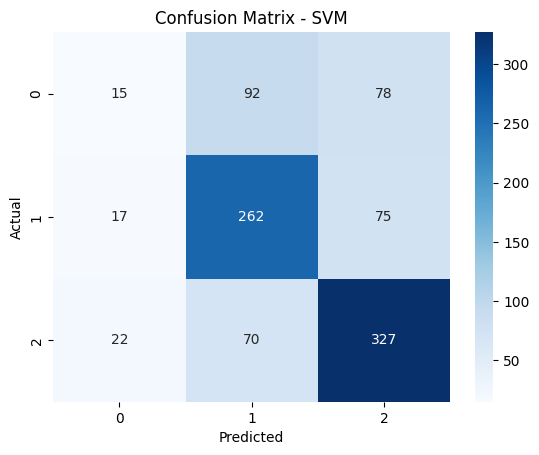

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("--- Support Vector Machine (SVM) ---")
print(f"Accuracy = {accuracy_svm * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**KNN**

--- K-Nearest Neighbors (KNN) ---
Accuracy = 57.20%
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.36      0.33       185
           1       0.59      0.61      0.60       354
           2       0.71      0.63      0.67       419

    accuracy                           0.57       958
   macro avg       0.53      0.53      0.53       958
weighted avg       0.59      0.57      0.58       958



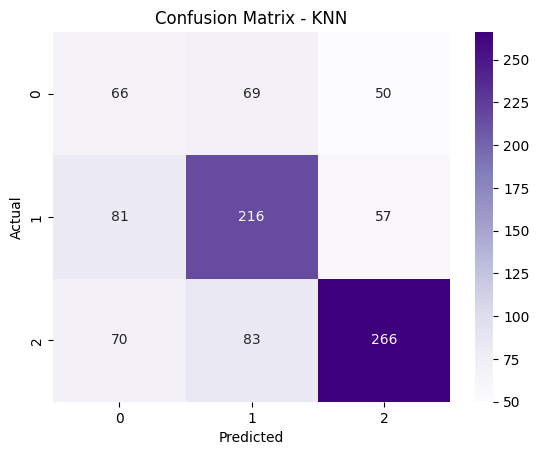

In [ ]:
--- Support Vector Machine (SVM) ---
Accuracy = 63.05%
Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.08      0.13       185
           1       0.62      0.74      0.67       354
           2       0.68      0.78      0.73       419

    accuracy                           0.63       958
   macro avg       0.53      0.53      0.51       958
weighted avg       0.58      0.63      0.59       958



**KNN (K = 1)**

--- K-Nearest Neighbors (KNN, k=1) ---
Accuracy = 65.76%
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.55      0.50       185
           1       0.68      0.69      0.69       354
           2       0.75      0.68      0.71       419

    accuracy                           0.66       958
   macro avg       0.63      0.64      0.63       958
weighted avg       0.67      0.66      0.66       958



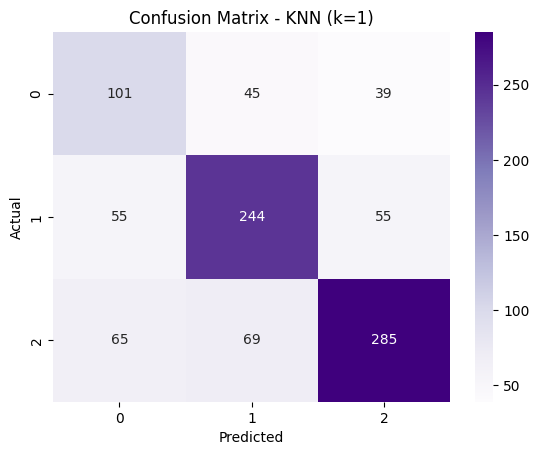

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# K-Nearest Neighbors with k=1
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print accuracy and classification report
print("--- K-Nearest Neighbors (KNN, k=1) ---")
print(f"Accuracy = {accuracy_knn * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Display confusion matrix with a unique color
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - KNN (k=1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Decision Tree**

Optimal max_depth: 19
Accuracy of optimized Decision Tree: 67.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.57      0.50       185
           1       0.72      0.71      0.71       354
           2       0.77      0.69      0.73       419

    accuracy                           0.67       958
   macro avg       0.65      0.66      0.65       958
weighted avg       0.69      0.67      0.68       958



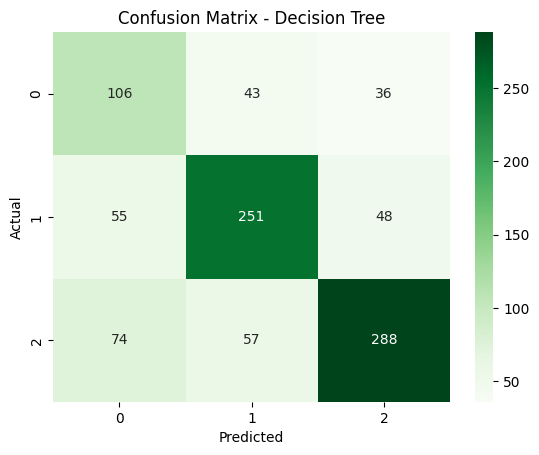

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the parameter grid for the Decision Tree
param_grid = {'max_depth': range(1, 21)}

# GridSearchCV to find the best max_depth
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_depth = grid_search.best_params_['max_depth']

# Print optimal max_depth
print(f"Optimal max_depth: {best_depth}")

# Train an optimized Decision Tree with the best max_depth
optimized_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
optimized_tree.fit(X_train, y_train)
y_pred_dt = optimized_tree.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of optimized Decision Tree: {accuracy_dt * 100:.2f}%")

# Display the classification report (precision, recall, f1-score, support)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Plot the confusion matrix with "Greens" color map
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Random Forest**

--- Random Forest ---
Accuracy = 73.59%
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.44      0.52       185
           1       0.71      0.80      0.75       354
           2       0.80      0.81      0.80       419

    accuracy                           0.74       958
   macro avg       0.71      0.68      0.69       958
weighted avg       0.73      0.74      0.73       958



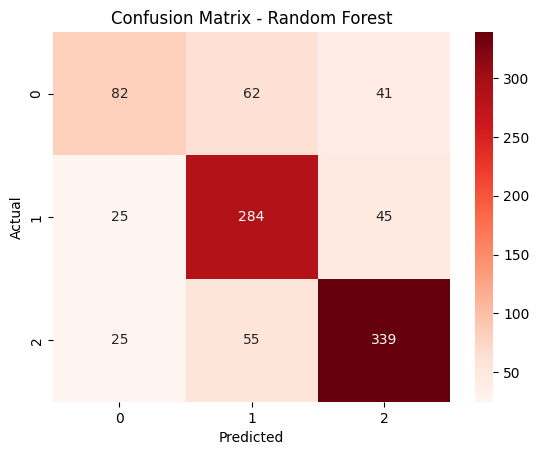

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("--- Random Forest ---")
print(f"Accuracy = {accuracy_rf * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Logistic Regression**

--- Logistic Regression ---
Accuracy = 64.30%
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.06      0.10       185
           1       0.62      0.74      0.67       354
           2       0.69      0.82      0.75       419

    accuracy                           0.64       958
   macro avg       0.54      0.54      0.51       958
weighted avg       0.59      0.64      0.59       958



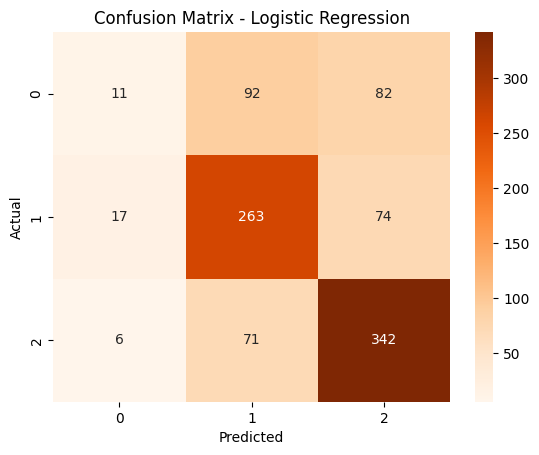

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("--- Logistic Regression ---")
print(f"Accuracy = {accuracy_lr * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Linear Classifier**

--- Linear Classifier (SGD) ---
Accuracy = 63.47%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.01       185
           1       0.58      0.79      0.67       354
           2       0.68      0.79      0.73       419

    accuracy                           0.63       958
   macro avg       0.76      0.53      0.47       958
weighted avg       0.71      0.63      0.57       958



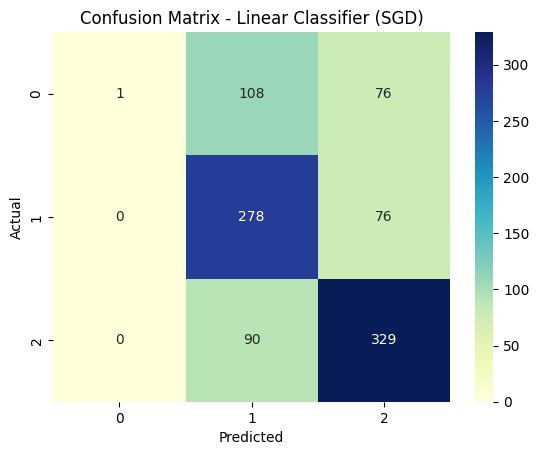

In [ ]:
linear_model = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("--- Linear Classifier (SGD) ---")
print(f"Accuracy = {accuracy_linear * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_linear))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Linear Classifier (SGD)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Accuracy Comparison and Final Output**

In [ ]:
accuracies = {
    "SVM": accuracy_svm,
    "KNN": accuracy_knn,
    "Decision Tree": accuracy_dt,
    "Random Forest": accuracy_rf,
    "Logistic Regression": accuracy_lr,
    "Linear Classifier": accuracy_linear
}

best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]
print(f"The best model for this dataset is {best_model} with an accuracy of {best_accuracy * 100:.2f}%")

The best model for this dataset is Random Forest with an accuracy of 73.59%
